In [107]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [108]:
toEvaluate = "INSIST_medium"
instances = {"preIntervention":[], "postIntervention":[]}

In [109]:
for instance in instances.keys():
    instancePath = os.path.join(toEvaluate, instance)
    file_list = os.listdir(instancePath)
    for file in file_list:
        file_path = os.path.join(instancePath, file)
        with open(file_path, 'rb') as f:
            instances[instance].append(np.load(f))
    instances[instance] = np.concatenate(instances[instance])
    print(len(instances[instance]))

postIntervention = np.random.choice(instances["postIntervention"], size=25000, replace=False)
preIntervention = np.random.choice(instances["preIntervention"], size=25000, replace=False)

80498
100944


In [110]:
preIntervention.shape, postIntervention.shape

((25000,), (25000,))

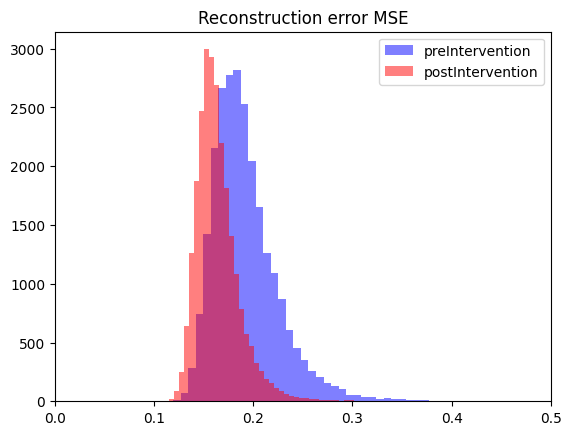

In [111]:
preToPrint = preIntervention[preIntervention<=0.5]
postToPrint = postIntervention[postIntervention<=0.5]

plt.title("Reconstruction error MSE")
plt.hist(preToPrint, bins=50, alpha=0.5, color='blue')

# Plot the second distribution as a histogram
plt.hist(postToPrint, bins=50, alpha=0.5, color='red')

# Add a legend
plt.legend(['preIntervention', 'postIntervention'])
plt.xlim(0,0.5)
# Show the plot
plt.show()

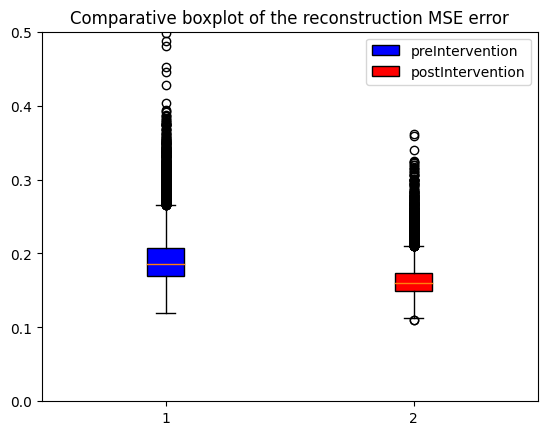

In [112]:
# Create a figure and axis
fig, ax = plt.subplots()

plt.title("Comparative boxplot of the reconstruction MSE error")
# Plot the first distribution as a boxplot
bp1 = ax.boxplot(preIntervention, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue'))

# Plot the second distribution as a boxplot
bp2 = ax.boxplot(postIntervention, positions=[2], patch_artist=True, boxprops=dict(facecolor='red'))

# Add a legend
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['preIntervention', 'postIntervention'])

plt.ylim(0,0.5)
# Show the plot
plt.show()

In [113]:
from scipy import stats

In [114]:
def Tstatistics(data1, data2):
    #Calculate descriptive measures
    n1=data1.shape[0]
    xbar1=np.mean(data1)
    s1=np.std(data1)
    n2 = data2.shape[0]
    xbar2=np.mean(data2)
    s2=np.std(data2)

    #Calculate t statistic
    tstat=(xbar1-xbar2)/np.sqrt((s1**2/n1)+(s2**2/n2))

    #Calculate degrees of freedom
    A=(s1**2)/n1
    B=(s2**2)/n2
    df=((A+B)**2)/(((A**2)/(n1-1))+((B**2)/(n2-1)))

    #Calculate degrees of freedom
    critialV = stats.t.ppf(1-.05, df)

    return {"Tstatistic":tstat, 
            "DegreesFreedom": df, 
            "CritialV":critialV}

In [115]:
tStatistics = Tstatistics(preIntervention, postIntervention)
tStatistics

{'Tstatistic': 84.3722711580131,
 'DegreesFreedom': 33905.39956056432,
 'CritialV': 1.6448985699710326}

In [116]:
# Perform the Welch’s t-test
stats.ttest_ind(preIntervention, postIntervention, equal_var=False, alternative="greater")

Ttest_indResult(statistic=84.37058369571515, pvalue=0.0)

### Without outliers

In [117]:
def interquartileRule(data):
    # Calculate the first quartile (Q1)
    Q1 = np.percentile(data, 25)

    # Calculate the third quartile (Q3)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outlier indices
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))

    # Select the elements that are not outliers
    b = np.delete(data, outlier_indices)

    return b

In [118]:
cleanPreIntervention = interquartileRule(preIntervention)
cleanPostIntervention = interquartileRule(postIntervention)

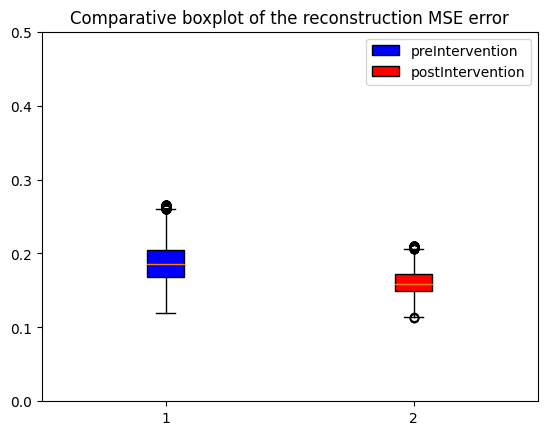

In [119]:
# Create a figure and axis
fig, ax = plt.subplots()

plt.title("Comparative boxplot of the reconstruction MSE error")
# Plot the first distribution as a boxplot
bp1 = ax.boxplot(cleanPreIntervention, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue'))

# Plot the second distribution as a boxplot
bp2 = ax.boxplot(cleanPostIntervention, positions=[2], patch_artist=True, boxprops=dict(facecolor='red'))

# Add a legend
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['preIntervention', 'postIntervention'])

plt.ylim(0,0.5)
# Show the plot
plt.show()

In [120]:
tStatistics = Tstatistics(cleanPreIntervention, cleanPostIntervention)
tStatistics

{'Tstatistic': 132.95317886178867,
 'DegreesFreedom': 41150.36738890201,
 'CritialV': 1.6448906570864956}

In [92]:
# Perform the Welch’s t-test
stats.ttest_ind(cleanPreIntervention, cleanPostIntervention, equal_var=False, alternative="greater")

Ttest_indResult(statistic=153.1947618209082, pvalue=0.0)